# Catalogue Analysis

For my literature review, I wanted to create graphs that could breakdown what currently is in space to provide the user with a basic understanding. The inspiration for a number of these plots come from multiple different places. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path = 'All_catalogue_latest.csv'

df = pd.read_csv(path)

orbital_objects = df[df['DECAY_DATE'].isnull()]

print(len(orbital_objects))

25891


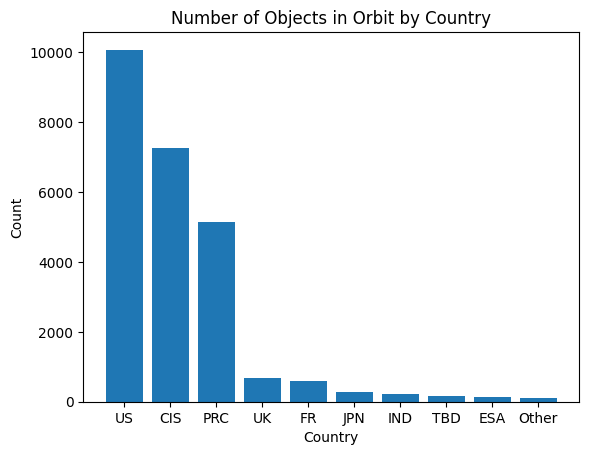

In [4]:

# Count the number of unique instances of 'COUNTRY_CODE'
country_counts = orbital_objects['COUNTRY_CODE'].value_counts()

# Create a new DataFrame from the country_counts Series
new_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

threshold = 100
new_df['Country_Plot'] = new_df.apply(lambda row: row['Country'] if row['Count'] > 100 else 'Other', axis=1)

plt.bar(new_df['Country_Plot'], new_df['Count'])
# Set the axis labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Objects in Orbit by Country')

# Show the plot
plt.show()


In [33]:
above_100.head()

OBJECT_TYPE,DEBRIS,PAYLOAD,ROCKET BODY,TBA,UNKNOWN
COUNTRY_CODE,,,,,
US,3927,5559,573,0,15
CIS,4672,1533,1039,0,20
PRC,4145,603,211,1,196
UK,0,671,1,0,0
FR,355,72,162,0,0


C:\Users\Windows10Pro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Windows10Pro\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


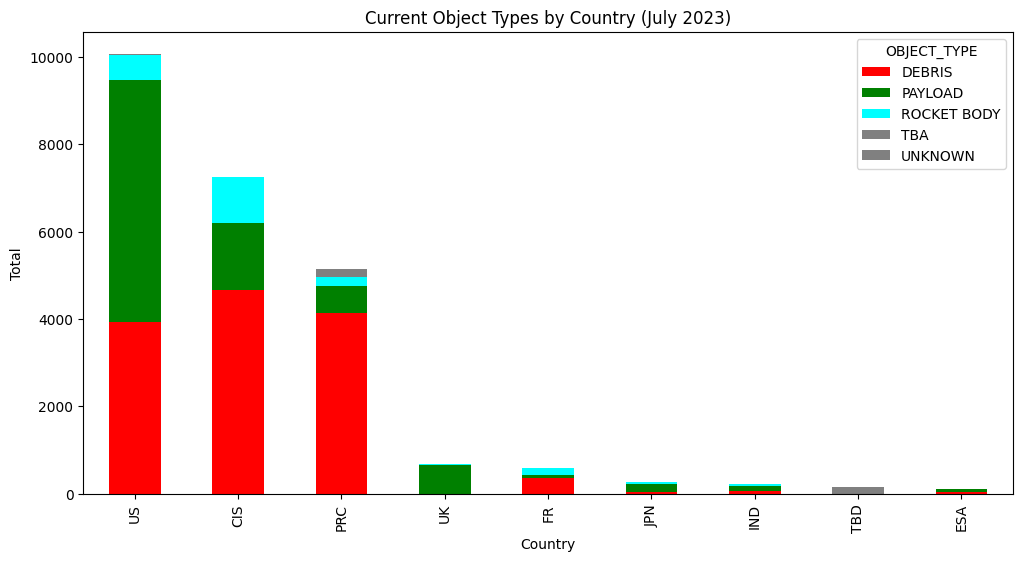

In [49]:
pivot_table = pd.pivot_table(orbital_objects, index='COUNTRY_CODE', columns='OBJECT_TYPE', aggfunc='size', fill_value=0)

# Reset the index to make 'Country_Code' a column
pivot_table = pivot_table.reset_index()

pivot_table['Sum'] = pivot_table['PAYLOAD'] + pivot_table['ROCKET BODY'] + pivot_table['DEBRIS'] + pivot_table['TBA'] + pivot_table['UNKNOWN']

above_100 = pivot_table[pivot_table['Sum'] > 100]

above_100.set_index('COUNTRY_CODE', inplace=True)
above_100.sort_values('Sum', ascending=False, inplace=True)
above_100.drop('Sum', axis=1, inplace=True)

colour_map = {'PAYLOAD': 'green', 'ROCKET BODY': 'aqua', 'DEBRIS': 'red', 'TBA': 'grey', 'UNKNOWN': 'grey'}

above_100.plot(kind='bar', stacked=True,  color=above_100.columns.map(colour_map), figsize=(12, 6))

plt.xlabel('Country')
plt.ylabel('Total')
plt.title('Current Object Types by Country (July 2023)')

# Show the plot
plt.show()

C:\Users\Windows10Pro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='LAUNCH_DATE', ylabel='ALTITUDE'>

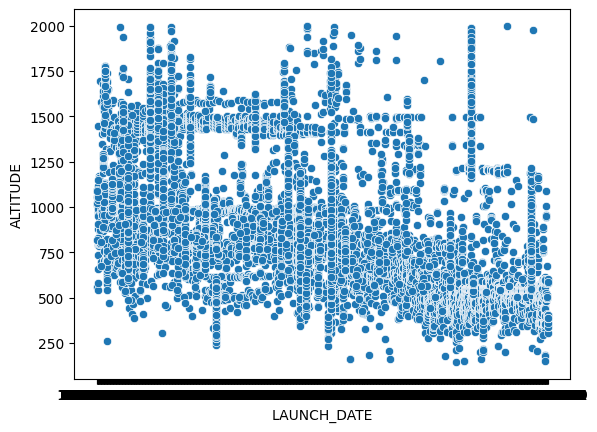

In [8]:
# Create a Launch Plot each satellite and the number of altitudes at which it has been launched
orbital_objects['ALTITUDE'] = (orbital_objects['APOAPSIS'] + orbital_objects['PERIAPSIS'])/2

filter_df = orbital_objects[orbital_objects['ALTITUDE'] < 2000]

sns.scatterplot(x='LAUNCH_DATE', y='ALTITUDE', data=filter_df)

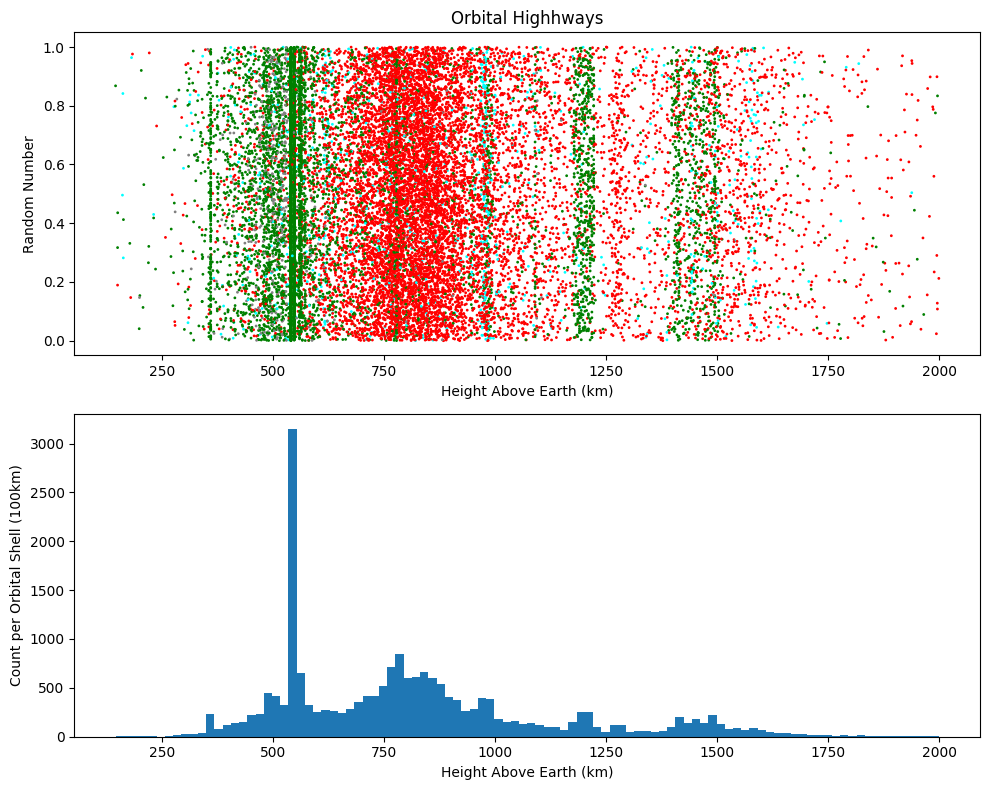

In [48]:
random_numbers = np.random.random(len(filter_df))

# create a 2x1 grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.scatter(filter_df['ALTITUDE'], random_numbers, c=filter_df['OBJECT_TYPE'].map(colour_map), s=1)
ax1.set_xlabel('Height Above Earth (km)')
ax1.set_ylabel('Random Number')
ax1.set_title('Orbital Highhways')

# Plot histogram
ax2.hist(filter_df['ALTITUDE'], bins=100)
ax2.set_xlabel('Height Above Earth (km)')
ax2.set_ylabel('Count per Orbital Shell (100km)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()